## Convolution Responses

In [1]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

Read the image

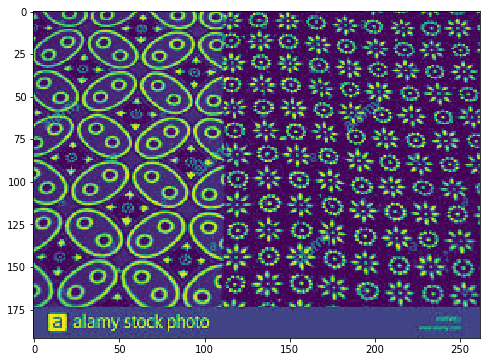

In [2]:
img = imread('circle_img.png')
plt.figure(figsize = (8,10))
plt.imshow(img)

## 1) Find the centers of flower-like patterns. Let us denote the image by $A\in \mathbb{R}^{H\times W}$.

Recall that the unique solution of the optimization problem 
$$
\begin{cases}
<x, x_0> \longrightarrow max \\
\|x\| = 1
\end{cases}
\qquad \qquad (*)
$$
is $x = \frac{x_0}{\|x_0\|}$.

### If we have a repeated pattern on an image, we can detect it by the following way:
- let's denote an instance of this pattern by $\tilde{\omega}\in \mathbb{R}^{h\times w}$.
- let $\tilde{\omega}$ is repeated in the image on the positions $k_1, k_2, \ldots, k_m$, i.e. the part (of the image $A$) of size $h\times w$ centered in $k_j$th pixel (for $j\in\{1,\ldots, m\}$) is equal (in practise similar) to the pattern $\tilde{\omega}$. We need to find $\{k_1, \ldots, k_m\}$.
- let's denote the part (of the image $A$) of size $h\times w$ centered in $k$th pixel  by $\omega_k$. So, we will get that 
$$
\omega_k \approx \tilde{\omega} \; \mbox{ for } \; k\in\{k_1,\ldots, k_m\}
$$
- so let's determine the $k$s, for which $\omega_k$ is similar to the $\tilde{\omega}$. 
- we define similarity of two vectors $u, v\in \mathbb{R}^{N}$ (here $N = h\cdot w$) by the cross-correlation of them (the problem $(*)$ gives some intuition to interpret this measure as similarity): 
$$
similarity(u,v) = <\frac{u}{\|u_0\|}, \frac{v}{\|v_0\|}>
$$
- so we need to find the $\omega_k$s, for which their cross-correlation with the $\tilde{\omega}$ is high, i.e. the dot product
$$
<\frac{\omega_k}{\|\omega_k\|}, \frac{\tilde{\omega}}{\|\tilde{\omega}\|}>
$$
is high.
- Since the term $\|\tilde{\omega}\|$ does not depend on $k$, we need to find such $k$s, for which $<\frac{\omega_k}{\|\omega_k\|}, \tilde{\omega}>$ is high.


### Hence, let's obtain an image $B$ with $k$th entry equals to $<\frac{\omega_k}{\|\omega_k\|}, \tilde{\omega}>$, then observe high values of $B$.

#### For this we need 
- convolution of the image $A$ with the kernel $\tilde{\omega}$. The result is denoted by $\tilde{A}$. By this we will get that the $k$th entry of $\tilde{A}$ equals to $<\omega_k, \tilde{\omega}>$;
- to obtain the image $\overline{A}$ with $k$th entry equals to $\|\omega_k\|$ ($\overline{A}^2$ can be obtained with the convolution with kernel ones on the image $A^2$);
- to divide $\tilde{A}$ on $\overline{A}$.

In [3]:
import numpy as np
from scipy.signal import convolve2d

In [4]:
def get_pattern(img, kernel): 
    tilde_A = convolve2d(img, kernel, boundary='symm', mode='same') # TODO obtain the image \tilde{A}
    overline_A = np.sqrt(convolve2d(np.square(img), np.ones(kernel.shape), boundary='symm', mode='same')) # TODO obtain the image \overline{A}
    result = tilde_A / overline_A 
    return result

Now as we have the image, it remains to get the instance of the pattern (a flower from the image $A$).

In [5]:
t, l, b, r = 1,142,12,156 # TODO determine the coordinates of an instance of the pattern using the image $A$
kernel = img[t:b, l:r]

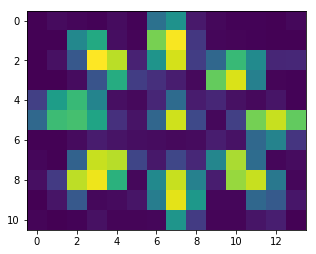

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(kernel)

Get the image $B$

In [7]:
result = get_pattern(img/255., kernel/255.)

Normalize the image $B$ to get values from [0,1].

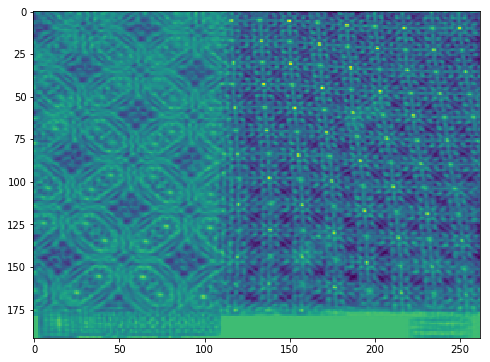

In [8]:
result = result / result.max()
plt.figure(figsize = (8,10))
plt.imshow(result)

Now let's take from $B$ only high values.

In [9]:
'define some treshold'
treshold = 0.7 # TODO change the treshold to get more accurate results.
centers = result.copy()
centers[result>=treshold] = 1
centers[result<treshold] = 0

Visualize the result

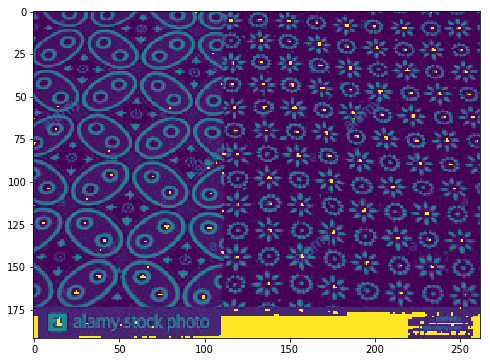

In [10]:
vis = img/255.
vis[centers==1] = 1
vis[centers!=1] *= 0.5
plt.figure(figsize = (8,10))
plt.imshow(vis)

## 2) Let a video is given. In the video a person is showing some hand jestures. Your task is to determine if at the moment person shows hand palm or not.

## So, find the frames of this video, where the person's jesture is hand palm !

Reading the video-file and partitioning it to frames with frequency 2 frames per second. It will take some time.

In [11]:
import cv2
import time
from tqdm import tqdm
from skimage.color import rgb2gray

In [12]:
vidcap = cv2.VideoCapture('jesture_video.mov')
frames = []
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames, image = vidcap.read()
    if hasFrames:
        frames.append(image)
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
start = time.time()
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
time.time() - start

14.115235567092896

In [13]:
# from scipy.signal import fftconvolve
# def get_pattern_frames(img, kernel): 
#     tilde_A = fftconvolve(img, kernel, mode='same')
#     overline_A = np.sqrt(fftconvolve(np.square(img), np.ones(kernel.shape), mode='same')) # TODO obtain the image \overline{A}
#     result = tilde_A / overline_A 
#     return result

Making the extracted frames grayscaled images:

In [14]:
frames_gr = []
for frame in tqdm(frames):
    frames_gr.append(rgb2gray(frame[:,:,::-1]))

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:11<00:00,  6.26it/s]


## The rest complete yourself. Try to obtain as high accuracy as possible. Accuracy is measured by the formula $\frac{TP}{N}$, where $TP$ is the number of right predictions and $N$ is the number of frames.

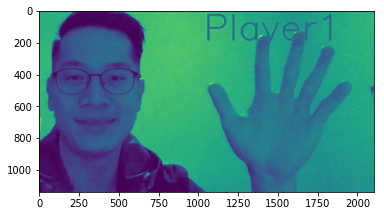

In [15]:
plt.imshow(frames_gr[18])

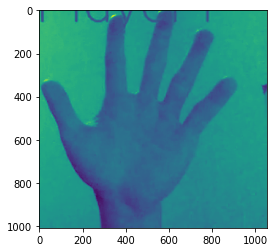

In [16]:
plt.imshow(frames_gr[18][130:, 1050:])

In [17]:
# t, l, b, r = 130,1050,950,2000

In [18]:
# for frame in frames_gr:
#     plt.imshow(frame[t:, l:])
#     plt.show()

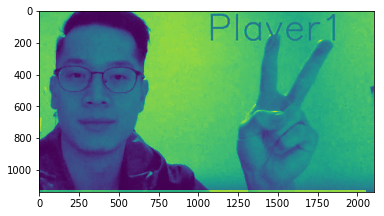

In [19]:
plt.imshow(frames_gr[0])

In [20]:
from scipy import ndimage, misc
frames_gr_minimized = []

for frame in tqdm(frames_gr):
#     plt.imshow(resize(frame, (int(frame.shape[0] / 4), int(frame.shape[1] / 4)), anti_aliasing=True))
    frames_gr_minimized.append(resize(frame, (int(frame.shape[0] / 8), int(frame.shape[1] / 8)), anti_aliasing=True))
#     frames_gr_minimized.append(misc.imresize(frame, (128, 128)))
#     frames_gr_minimized.append(misc.imresize(frame[t:, l:], (128, 128)))

  0%|                                                                                           | 0/69 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:05<00:00, 12.74it/s]


In [21]:
kernel = frames_gr_minimized[18][10:, 130:250]

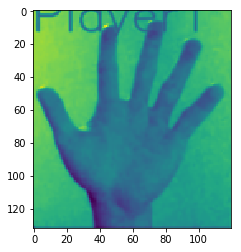

In [22]:
plt.imshow(kernel);

In [23]:
img = frames_gr_minimized[2]

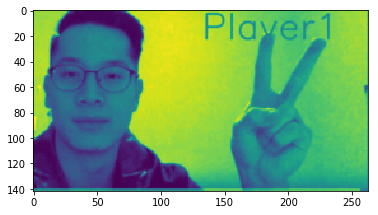

In [24]:
plt.imshow(img)

In [33]:
# img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
# kernel = cv2.GaussianBlur(kernel,(5,5),cv2.BORDER_DEFAULT)

In [26]:
result = get_pattern(img, kernel)

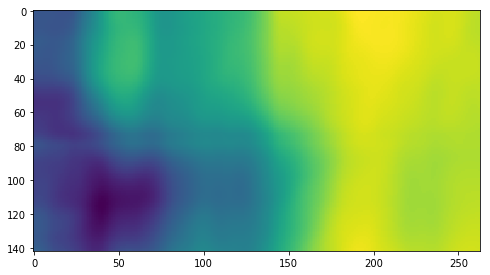

In [28]:
result = result / result.max()
plt.figure(figsize = (8,10))
plt.imshow(result)

In [29]:
result

array([[0.81222048, 0.81221591, 0.81219308, ..., 0.97473843, 0.97432172,
        0.9740031 ],
       [0.81193468, 0.81196041, 0.81196881, ..., 0.97456428, 0.97415983,
        0.97385678],
       [0.8117258 , 0.81179729, 0.81184827, ..., 0.97439407, 0.97400142,
        0.97371269],
       ...,
       [0.81939657, 0.81949509, 0.81911739, ..., 0.98181698, 0.98165427,
        0.98145895],
       [0.82057059, 0.82065312, 0.82025849, ..., 0.98207871, 0.98190984,
        0.98170991],
       [0.82173795, 0.82181349, 0.8214138 , ..., 0.9823325 , 0.98215927,
        0.98195592]])

In [30]:
'define some treshold'
treshold = 0.99
centers = result.copy()
centers[result>=treshold] = 1
centers[result<treshold] = 0

In [31]:
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

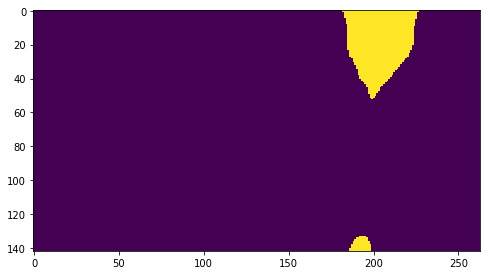

In [32]:
vis = img/255.
# vis = img
vis[centers==1] = 1
vis[centers!=1] *= 0.5
plt.figure(figsize = (8,10))
plt.imshow(vis)

In [615]:
# print( np.unravel_index(np.argmax(vis), vis.shape))

In [646]:
# results = []
# kernel = frames_gr_minimized[18]

# for frame in tqdm(frames_gr_minimized):
#     results.append(get_pattern(frame, kernel))

## PCA for frames dimensionality reduction, but it didn't work out.

In [675]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [676]:
frames_gr_minimized_flatten = []

for frame in tqdm(frames_gr_minimized):
    frames_gr_minimized_flatten.append(frame.flatten())

100%|███████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 65181.75it/s]


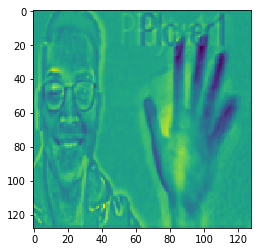

In [678]:
scaler = StandardScaler()

scaler.fit(frames_gr_minimized_flatten)

frames_gr_minimized_flatten = scaler.transform(frames_gr_minimized_flatten)

pca = PCA(.95)

pca.fit(frames_gr_minimized_flatten)

# pca.n_components_ # 37 components

frames_gr_minimized_flatten_pca = pca.transform(frames_gr_minimized_flatten)

plt.imshow(pca.inverse_transform(frames_gr_minimized_flatten_pca[18]).reshape(128,128));

In [679]:
kernel_pca = frames_gr_minimized_flatten_pca[18]

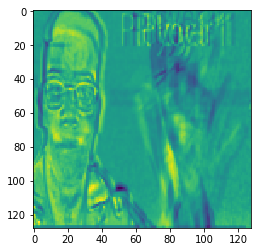

In [683]:
from scipy.signal import convolve

def get_pattern_frames_pca(img, kernel): 
    tilde_A = convolve(img, kernel, mode='same')
    overline_A = np.sqrt(convolve(np.square(img), np.ones(kernel.shape), mode='same'))
    result = tilde_A / overline_A 
    return result

result_1 = get_pattern_frames_pca(frames_gr_minimized_flatten_pca[0], kernel_pca)

plt.imshow(pca.inverse_transform(result_1).reshape(128,128));

In [684]:
'define some treshold'
treshold = 0.9 # TODO change the treshold to get more accurate results.
centers = result_1.copy()
centers[result_1>=treshold] = 1
centers[result_1<treshold] = 0

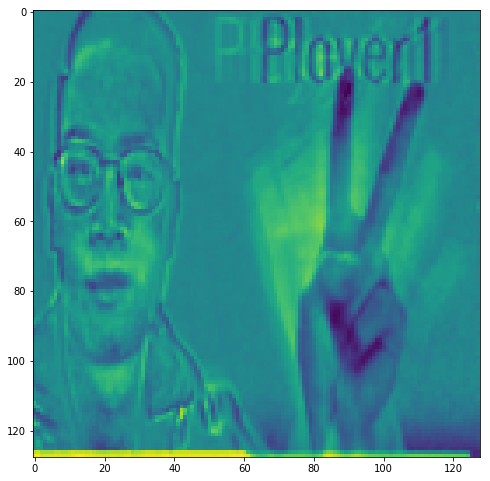

In [685]:
vis = frames_gr_minimized_flatten_pca[0]
vis[centers==1] = 1
vis[centers!=1] *= 0.5
plt.figure(figsize = (8,10))
plt.imshow(pca.inverse_transform(vis).reshape(128,128))